In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [3]:
df = pd.read_csv("/content/bitcoin_cash_price.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",602.68,626.21,602.45,616.30,"375,367,000","10,105,200,000"
1,"Nov 06, 2017",630.31,657.34,602.65,602.65,"794,105,000","10,566,600,000"
2,"Nov 05, 2017",619.91,635.72,579.13,630.70,"816,028,000","10,390,900,000"
3,"Nov 04, 2017",635.35,642.05,571.12,620.45,"1,161,370,000","10,647,200,000"
4,"Nov 03, 2017",587.32,684.53,577.86,625.32,"1,682,210,000","9,839,760,000"


In [8]:
df1 = df[['Date','Close']]
df1.head(3)

,Date,Close
0,"Nov 07, 2017",616.30
1,"Nov 06, 2017",602.65
2,"Nov 05, 2017",630.70


In [14]:
def get_df():
    df1['date'] = pd.to_datetime(df1['Date'], errors='coerce')
    df1['year'] = df1.date.dt.year
    df1['month'] = df1.date.dt.month
    return df1

df = get_df()
df.head(10)

,Date,Close,date,year,month
0,"Nov 07, 2017",616.30,2017-11-07,2017,11
1,"Nov 06, 2017",602.65,2017-11-06,2017,11
2,"Nov 05, 2017",630.70,2017-11-05,2017,11
3,"Nov 04, 2017",620.45,2017-11-04,2017,11
4,"Nov 03, 2017",625.32,2017-11-03,2017,11
5,"Nov 02, 2017",587.22,2017-11-02,2017,11
6,"Nov 01, 2017",531.83,2017-11-01,2017,11
7,"Oct 31, 2017",439.05,2017-10-31,2017,10
8,"Oct 30, 2017",448.23,2017-10-30,2017,10
9,"Oct 29, 2017",451.92,2017-10-29,2017,10


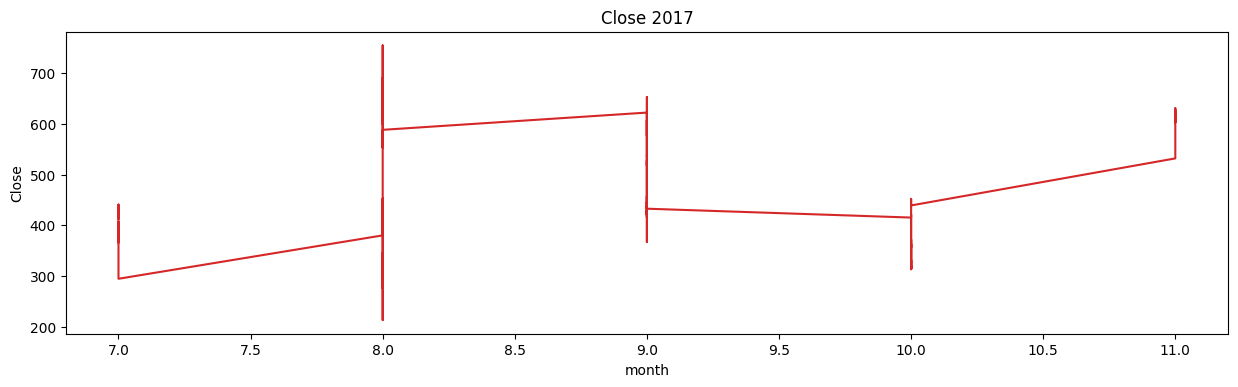

In [18]:
def plot_df(df, x, y, title="", xlabel='month', ylabel='Close', dpi=100, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df['month'], y=df['Close'], title='Close 2017', color="tab:red")

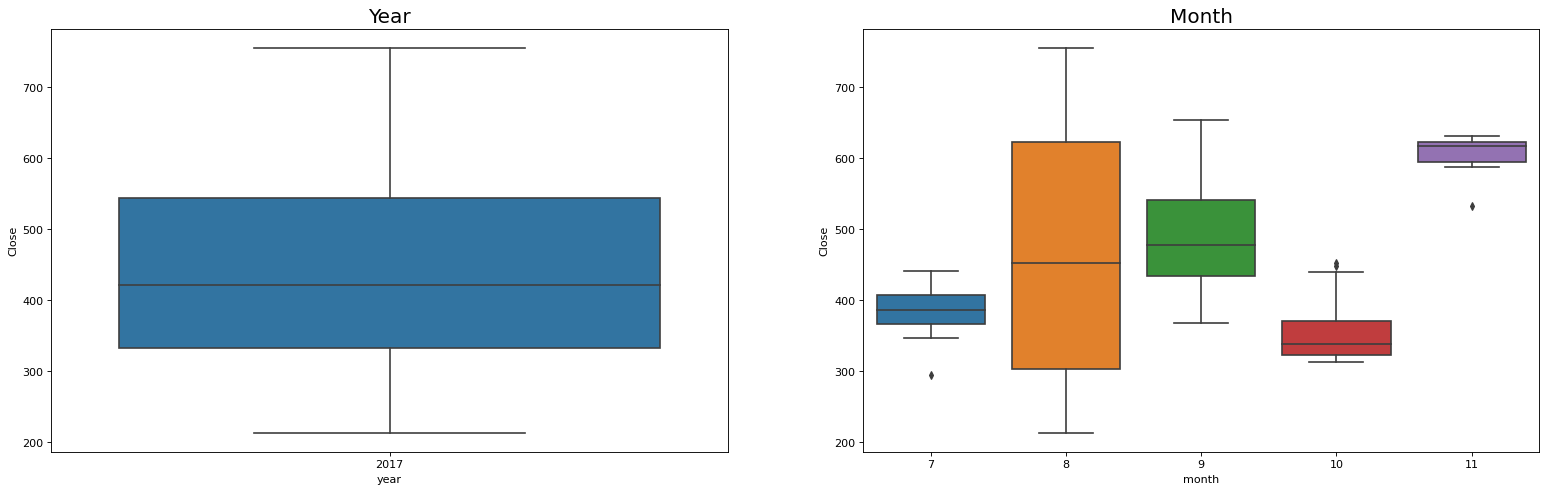

In [23]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(24,7), dpi= 80)
sns.boxplot(x='year', y='Close', data=df, ax=axes[0])
sns.boxplot(x='month', y='Close', data=df)

# Set Title
axes[0].set_title('Year', fontsize=18); 
axes[1].set_title('Month', fontsize=18)
plt.show()

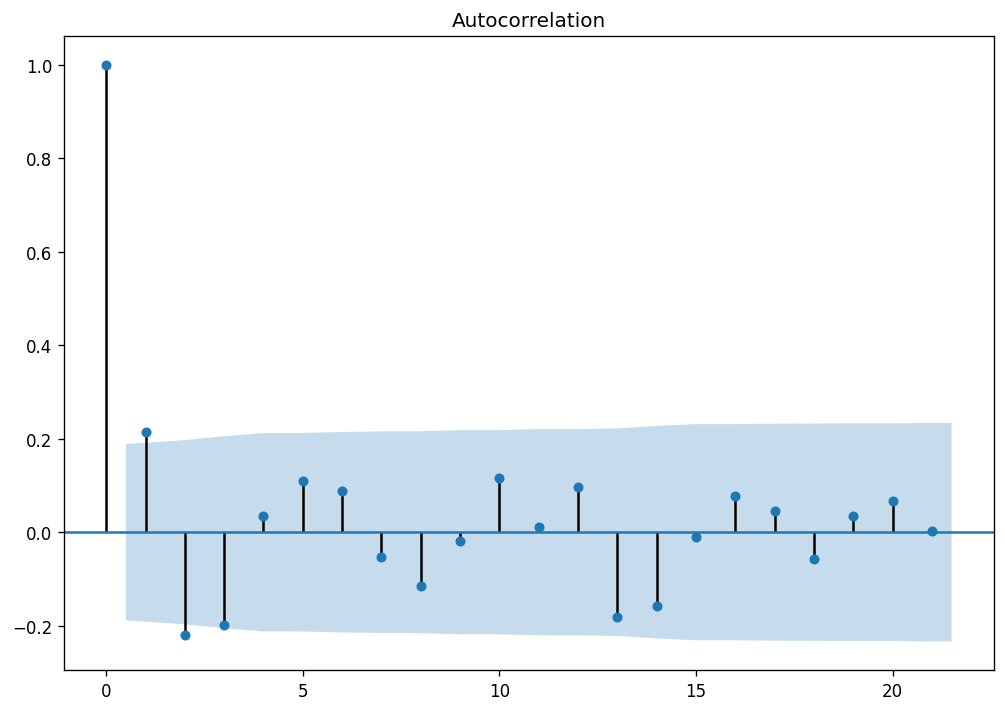

In [24]:
# First Order Differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ts_diff = np.diff(df['Close'])
df['Close_diff1'] = np.append([0], ts_diff)

plot_acf(df['Close_diff1'])
dataset = df['Close_diff1'].values

In [25]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [26]:
df = get_df()
dataset = df['Close']
dataframe = pd.concat([dataset.shift(1), dataset], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.920432
t+1  0.920432  1.000000


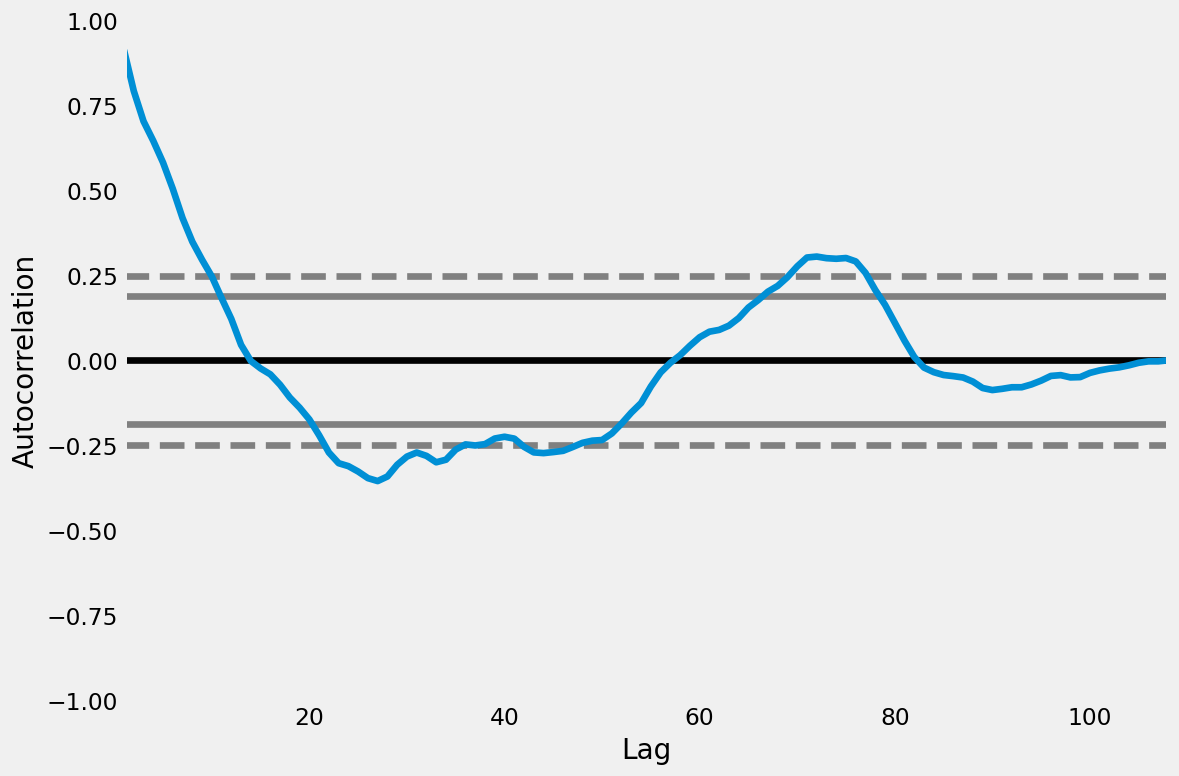

In [27]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dataset)

# AR

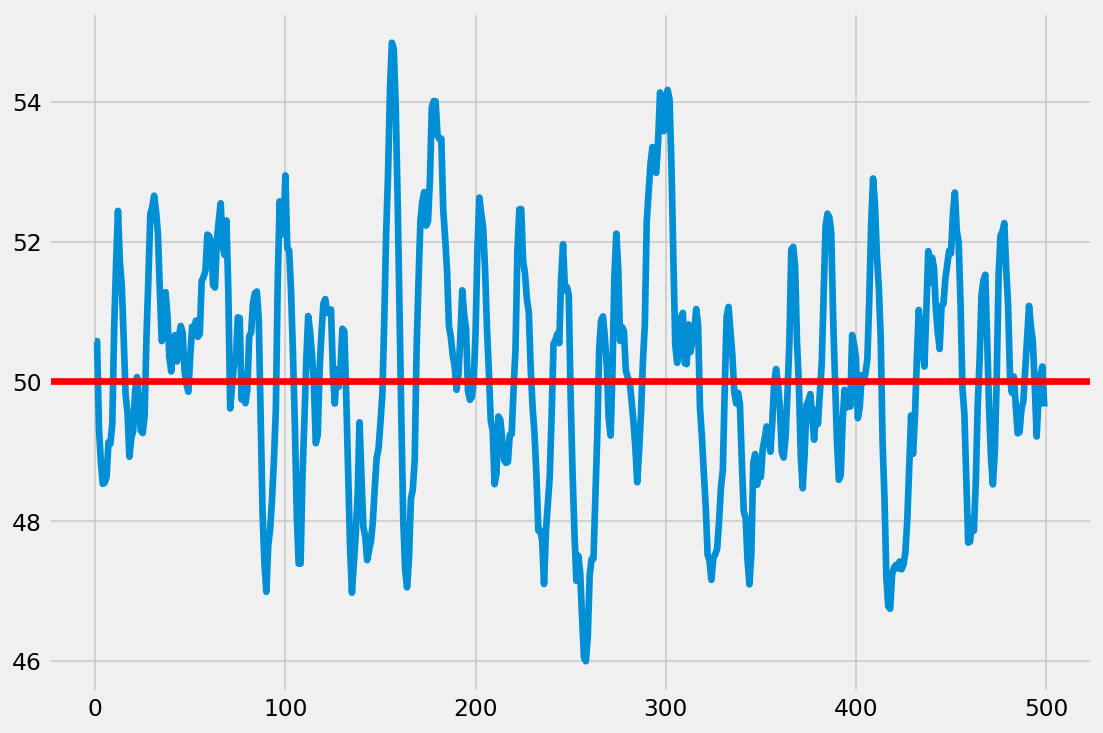

In [28]:
p1 = 1.5
p2 = -0.6
c = 5
w = 0.5
T = 500
mean = c/(1-p1-p2)

ar_data = np.zeros(T)
ar_data[0] = mean + np.random.normal(0, w)
ar_data[1] = mean + np.random.normal(0, w)
for t in range(2, T):
    ar_data[t] = c + p1*ar_data[t-1] + p2*ar_data[t-2] + np.random.normal(0, w)


plt.plot(ar_data)
plt.axhline(y=mean, color='r', linestyle='-')

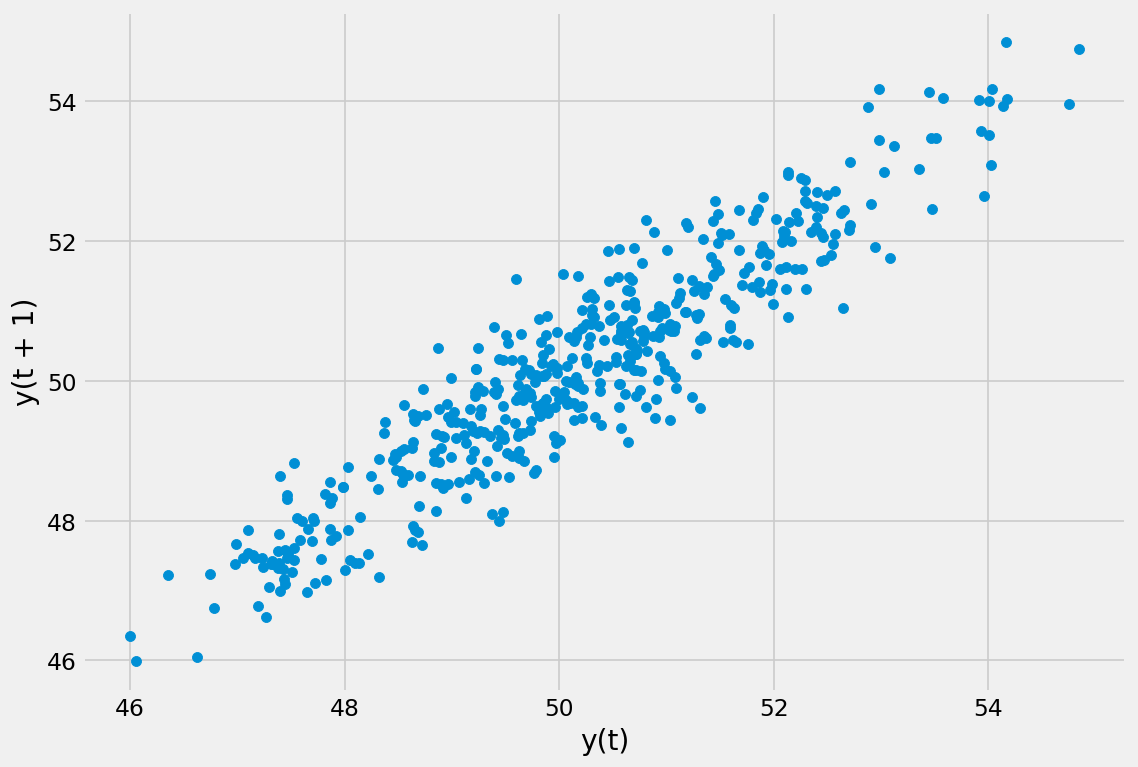

In [29]:
# plot correlation
from pandas.plotting import lag_plot
lag_plot(pd.DataFrame(ar_data))

In [30]:
import statsmodels.api as sm

model = sm.tsa.AR(ar_data)
print("Order of model: ", model.select_order(maxlag=7, ic='aic')) 

Order of model:  2


In [31]:
predicted_model = model.fit(maxlag=3)
print("Params of model: ", predicted_model.params)

Params of model:  [ 5.62046399  1.4801967  -0.57481135 -0.0174045 ]


In [32]:

pred = predicted_model.predict(3, 300)
rmse = np.sqrt(mean_squared_error(ar_data[3:301], pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.498


In [33]:
model = sm.tsa.AR(ar_data)
print("Order of model: ", model.select_order(maxlag=6, ic='aic')) 
predicted_model = model.fit(maxlag=2)
print("Params of model: ", predicted_model.params)

pred = predicted_model.predict(2, 300)
rmse = np.sqrt(mean_squared_error(ar_data[2:301], pred))
print('Test RMSE: %.3f' % rmse)

Order of model:  2
Params of model:  [ 5.54057211  1.49045577 -0.60093094]
Test RMSE: 0.503


Coefficients: [ 0.94750467  0.27677685 -0.21227811 -0.10848742  0.0395852  -0.04052292
  0.01380632  0.04757495 -0.09564842 -0.02888865  0.15193175 -0.11017051
  0.20913266]
predicted=-0.644074, expected=-72.650000
predicted=-43.732326, expected=-85.550000
predicted=-7.465137, expected=51.200000
predicted=8.875257, expected=39.110000
predicted=9.791597, expected=21.280000
predicted=3.144153, expected=-20.570000
predicted=-4.271558, expected=-19.660000
predicted=-31.064454, expected=41.080000
predicted=4.401423, expected=33.800000
predicted=16.112099, expected=-27.640000
Test RMSE: 0.503


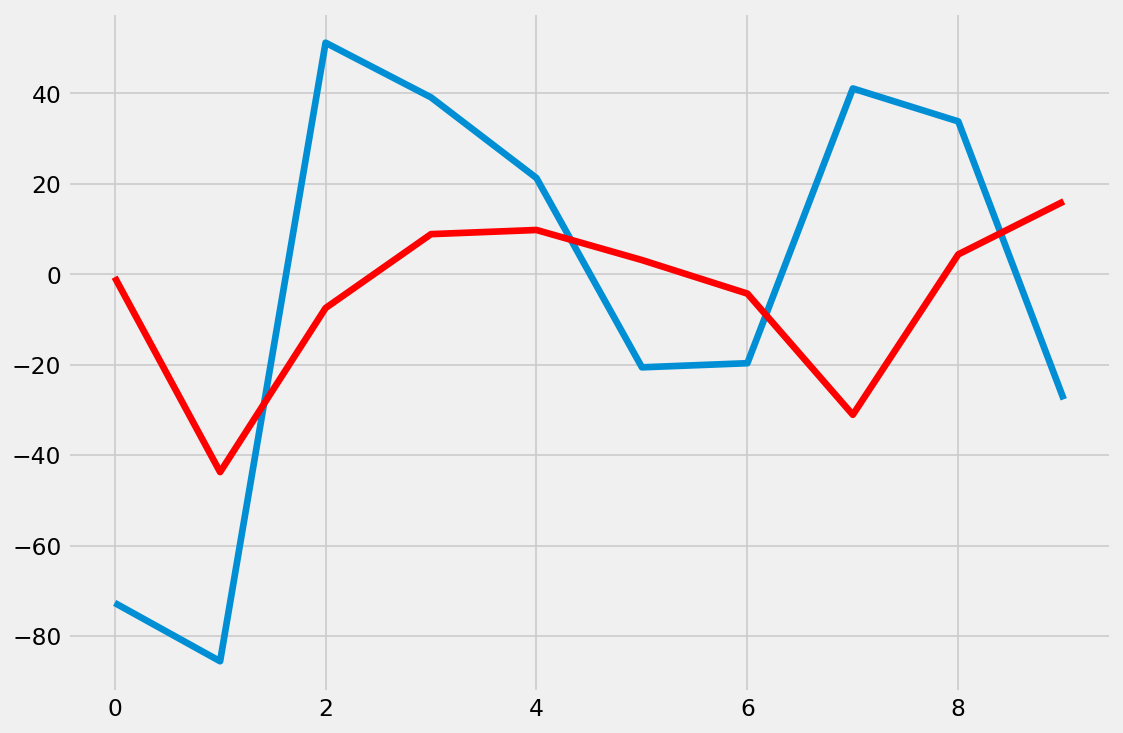

In [34]:
# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Close'])
df['Close_diff1'] = np.append([0], ts_diff)
dataset = df['Close_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# train autoregression
model = AutoReg(train, lags=12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 
rmse1 = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

MA


In [35]:
from statsmodels.tsa.arima_model import ARMA

u = 3
p = -0.6
T = 500
mean = u
w = np.random.normal(loc=0, scale=1, size=500)
data = np.zeros(500)
data[0] = 3 + w[0]
for i in range(1,500):
    data[i] = 3 + w[i] - 0.6*w[i-1]

In [36]:
# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
print(model_fit.params)

[ 3.00080163 -0.53940894]


Coefficients: [-1.81705154e+00  3.41353647e-01 -1.61881652e-01 -1.50564814e-01
  6.09979650e-02  6.64010824e-03 -3.44438176e-03 -1.49682467e-02
 -6.21607256e-02 -1.17228319e-01  1.84776310e-01  2.12171564e+03]
predicted=3.878040, expected=-72.650000
predicted=-49.236664, expected=-85.550000
predicted=10.736395, expected=51.200000
predicted=5.253235, expected=39.110000
predicted=3.542908, expected=21.280000
predicted=-17.578304, expected=-20.570000
predicted=-10.446938, expected=-19.660000
predicted=-16.968031, expected=41.080000
predicted=15.870689, expected=33.800000
predicted=6.979742, expected=-27.640000
Test RMSE: 0.503


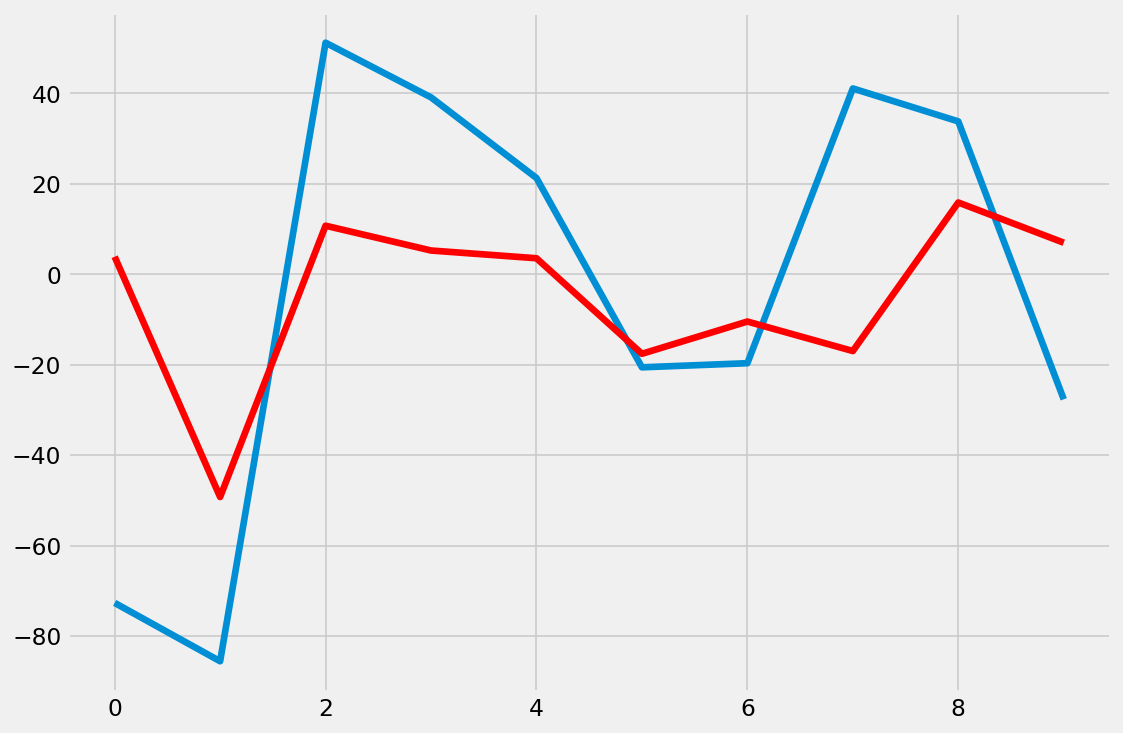

In [37]:
# create and evaluate a MA 
from statsmodels.tsa.arima.model import ARIMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Close'])
df['Close_diff1'] = np.append([0], ts_diff)
dataset = df['Close_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# train MA
model = ARIMA(train, order=(0, 0, 10))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 
rmse2 = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

ARMA

In [43]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima_model import ARMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Close'])
df['Close_diff1'] = np.append([0], ts_diff)
dataset = df['Close_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# fit model
model = ARMA(train, order=(2, 8))
model_fit = model.fit(disp=False)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

ValueError: ignored

ARIMA

Coefficients: [-1.93524135e+00  1.46537963e-01  3.15952850e-02 -8.71339247e-01
  1.05137229e-01 -1.36540031e-01  8.55052764e-01  3.58962048e-01
 -9.26347121e-03  2.08538511e+03]
predicted=19.959781, expected=-72.650000
predicted=-18.733308, expected=-85.550000
predicted=-14.916887, expected=51.200000
predicted=-12.026705, expected=39.110000
predicted=10.492425, expected=21.280000
predicted=10.878458, expected=-20.570000
predicted=9.128196, expected=-19.660000
predicted=-10.737889, expected=41.080000
predicted=-14.040690, expected=33.800000
predicted=-13.627279, expected=-27.640000
ARIMA(3,0,5) --> AIC=1048.8492857425458; BIC=1074.6989605292515
Test RMSE: 0.503


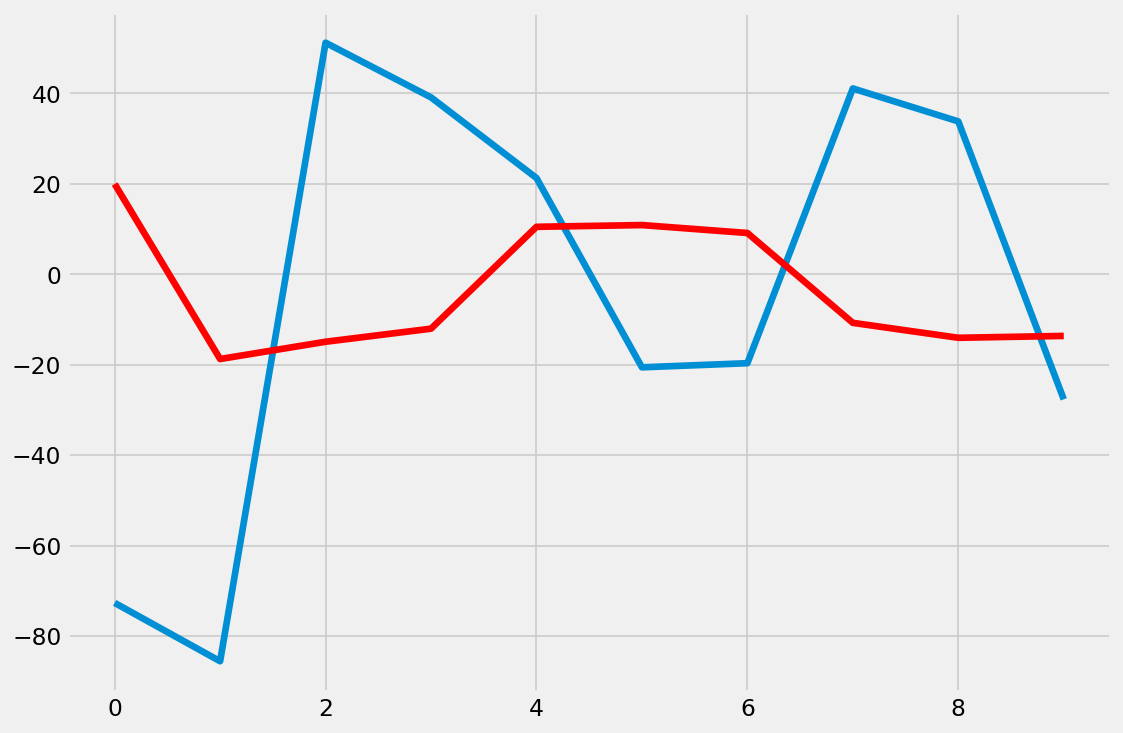

In [45]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Close'])
df['Close_diff1'] = np.append([0], ts_diff)
dataset = df['Close_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]
order = (3, 0, 5)

# fit model
model = ARIMA(train, order=order)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 

model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
print('{} --> AIC={}; BIC={}'.format(model_name, model_fit.aic, model_fit.bic))

rmse4 = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Mục mới

In [46]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   98
Model:                 ARIMA(3, 0, 5)   Log Likelihood                -514.425
Date:                Mon, 21 Nov 2022   AIC                           1048.849
Time:                        15:44:58   BIC                           1074.699
Sample:                             0   HQIC                          1059.305
                                 - 98                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9352      7.564     -0.256      0.798     -16.761      12.890
ar.L1          0.1465      0.278      0.528      0.598      -0.397       0.691
ar.L2          0.0316      0.202      0.157      0.875      -0.364       0.427
ar.L3         -0.8713      0.195     -4.476      0.000      -1.253      -0.490
ma.L1          0.1051      3.571      0.029      0.977      -6.893       7.103
ma.L2         -0.1365      1.547     -0.088      0.930      -3.168       2.895
ma.L3          0.8551      6.210      0.138      0.890     -11.316      13.026
ma.L4          0.3590      2.056      0.175      0.861      -3.671       4.389
ma.L5         -0.0093      0.175     -0.053      0.958      -0.352       0.334
sigma2      2085.3851   1.21e+04      0.172      0.863   -2.16e+04    2.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                52.38
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.72   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
def compare_rmse(rmse1, rmse2, rmse3, rmse4):
    print('RMSE of AR: ', rmse1)
    print('RMSE of MA: ', rmse2)
    print('RMSE of ARIMA: ', rmse3)
    print('RMSE of ARMA: ', rmse4)
    if rmse1 < rmse2 and rmse1 < rmse3 and rmse1 < rmse4:
        print('AR is the best model')
    elif rmse2 < rmse1 and rmse2 < rmse3 and rmse2 < rmse4:
        print('MA is the best model')
    elif rmse3 < rmse1 and rmse3 < rmse2 and rmse3 < rmse4:
        print('ARIMA is the best model')
    else:
        print('ARMA is the best model')
compare_rmse(rmse1, rmse2, rmse3, rmse4)

NameError: ignored